**IMPORTING LIBRARIES**

In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

**LOADING THE DATASET**

In [384]:
df = pd.read_csv('credit_risk.csv')

df.head(5000)

Id  status  laufzeit  credit_history  purpose  amount  savings  \
0      0       1        18               4        2    1049        1   
1      1       1         9               4        0    2799        1   
2      2       2        12               2        9     841        2   
3      3       1        12               4        0    2122        1   
4      5       1        10               4        0    2241        1   
..   ...     ...       ...             ...      ...     ...      ...   
795  993       1        18               4        0    3966        1   
796  994       1        12               0        3    6199        1   
797  997       4        21               4        0   12680        5   
798  998       2        12               2        3    6468        5   
799  999       1        30               2        2    6350        5   

     employment_duration  installment_rate  personal_status_sex  ...  \
0                      2                 4                    2  ...   
1                      3                 2                    3  ...   
2                      4                 2                    2  ...   
3                      3                 3                    3  ...   
4                      2                 1                    3  ...   
..                   ...               ...                  ...  ...   
795                    5                 1                    2  ...   
796                    3                 4                    3  ...   
797                    5                 4                    3  ...   
798                    1                 2                    3  ...   
799                    5                 4                    3  ...   

     property  age  other_installment_plans  housing  number_credits  job  \
0           2   21                        3        1               1    3   
1           1   36                        3        1               2    3   
2           1   23                        3        1               1    2   
3           1   39                        3        1               2    2   
4           1   48                        3        1               2    2   
..        ...  ...                      ...      ...             ...  ...   
795         1   33                        1        1               3    3   
796         2   28                        3        1               2    3   
797         4   30                        3        3               1    4   
798         4   52                        3        2               1    4   
799         2   31                        3        2               1    3   

     people_liable  telephone  foreign_worker  credit_risk  
0                2          1               2            1  
1                1          1               2            1  
2                2          1               2            1  
3                1          1               1            1  
4                1          1               1            1  
..             ...        ...             ...          ...  
795              2          2               2            0  
796              2          2               2            0  
797              2          2               2            0  
798              2          2               2            0  
799              2          1               2            0  

[800 rows x 22 columns]

**Column name: laufzeit
means credit duration in months (quantitative)**

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   laufzeit                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

 ***Exploratory Data Analysis (EDA)***

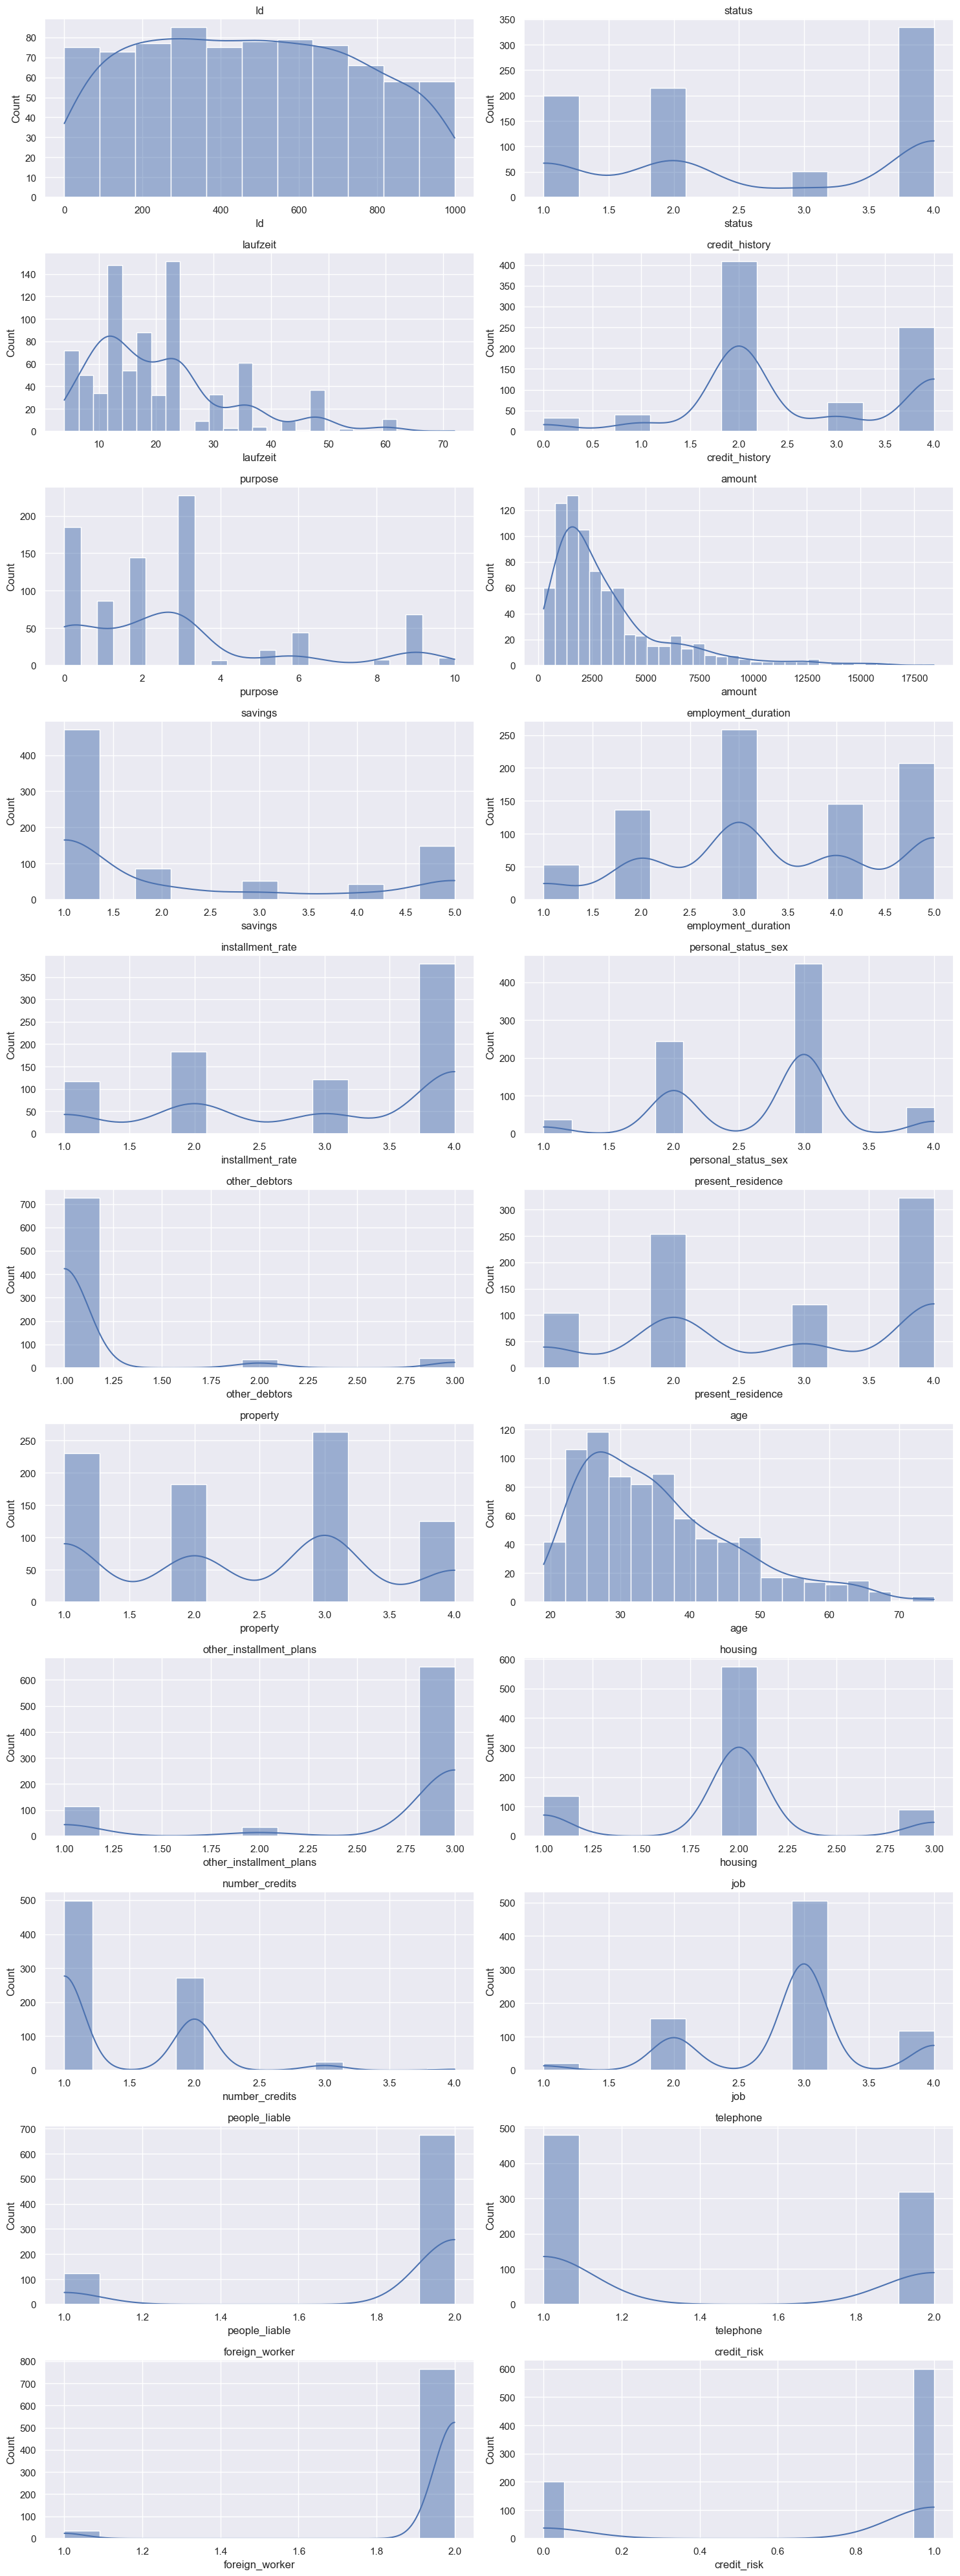

In [386]:

fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(15, 40))
for i, col in enumerate(df.columns):
    ax = axes.flatten()[i]
    sns.histplot(df[col], ax=ax, kde=True) 
    ax.set_title(col)

plt.tight_layout()
plt.show()

*CONSIDERING THE DATA FOR PROCESSING THE CREDIT RISK:*

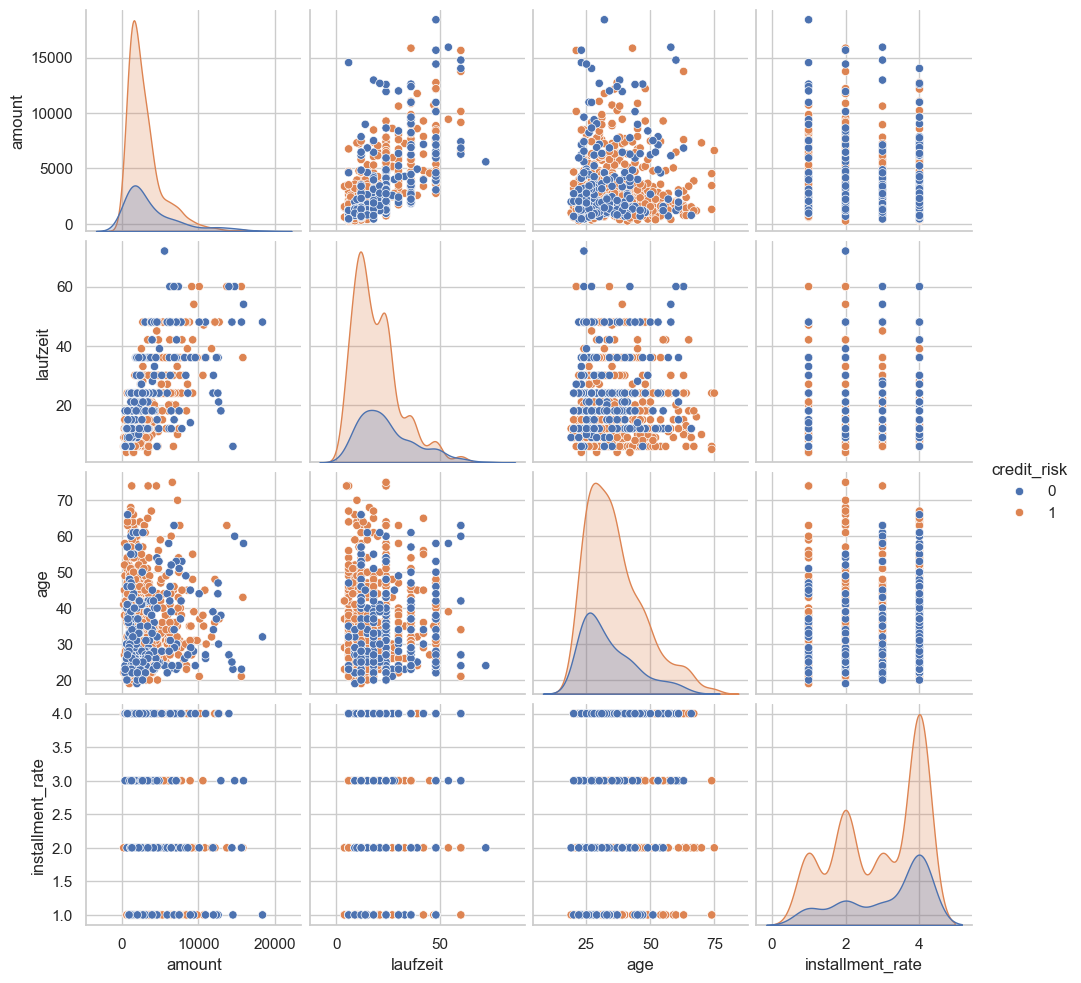

In [387]:
selected_features = ['amount', 'laufzeit', 'age', 'installment_rate', 'credit_risk']
pairplot_data = df[selected_features].copy()

pairplot_data['credit_risk'] = pairplot_data['credit_risk']

pairplot_data = pairplot_data.dropna()


sns.set(style="whitegrid")

sns.pairplot(pairplot_data, hue='credit_risk', diag_kind='kde')  
plt.show()



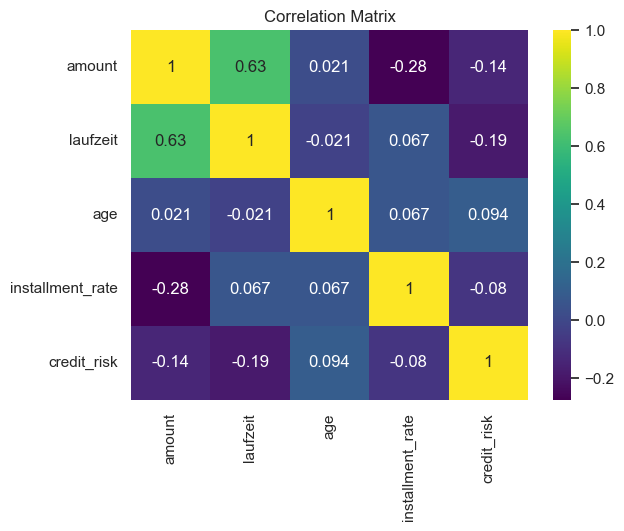

In [388]:
corr_matrix = pairplot_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

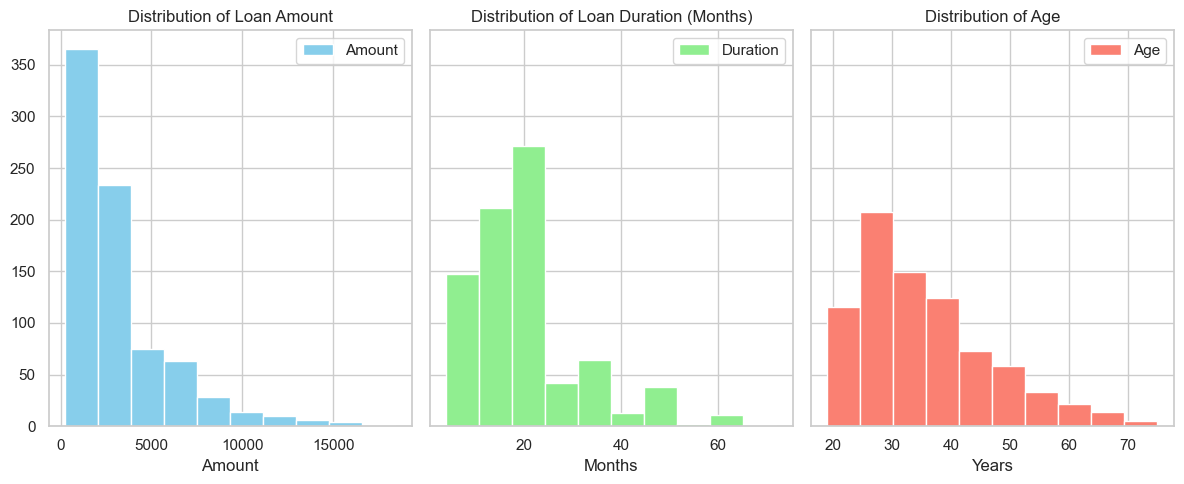

In [389]:
fig, axis = plt.subplots(1, 3, figsize=(12, 5), sharey=True)


axis[0].hist(df['amount'], color='skyblue', label='Amount') 
axis[0].set_title('Distribution of Loan Amount')
axis[0].set_xlabel('Amount')

axis[1].hist(df['laufzeit'], bins=10, color='lightgreen', label='Duration')  
axis[1].set_title('Distribution of Loan Duration (Months)')
axis[1].set_xlabel('Months')

axis[2].hist(df['age'], color='salmon', label='Age')  
axis[2].set_title('Distribution of Age')
axis[2].set_xlabel('Years')

for ax in axis:
    ax.legend()

plt.tight_layout()
plt.show()

C:\Users\Amirthesh\AppData\Local\Temp\ipykernel_19348\1805278231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='credit_risk', data=df, palette='viridis')


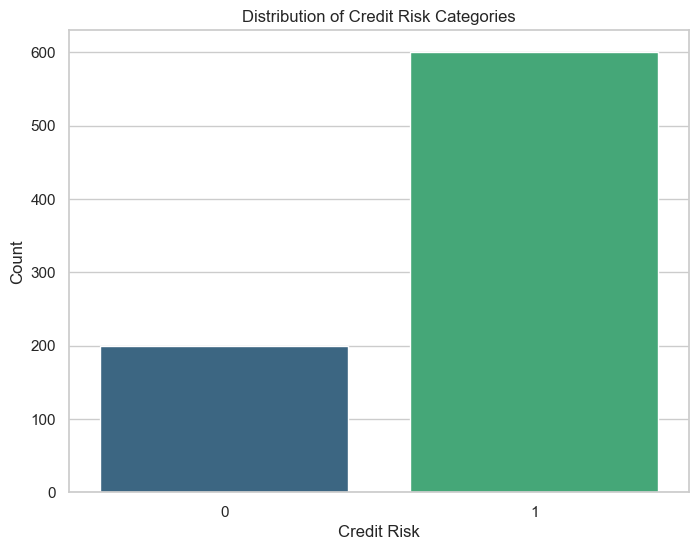

In [390]:

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='credit_risk', data=df, palette='viridis')
plt.title('Distribution of Credit Risk Categories')
plt.xlabel('Credit Risk')
plt.ylabel('Count')


plt.show()


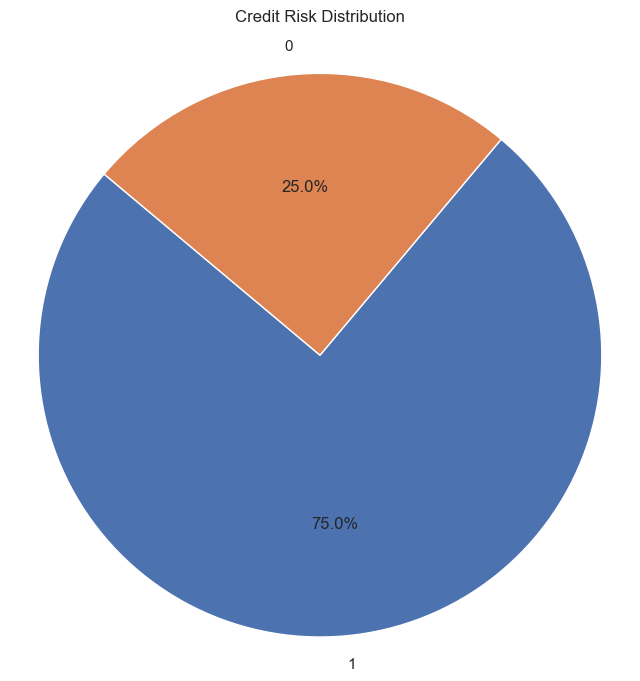

In [391]:

credit_risk_counts = df['credit_risk'].value_counts().sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(credit_risk_counts, labels=credit_risk_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Credit Risk Distribution\n')
plt.axis('equal')  
plt.show()

**TRAINING AND EVALUATING THE MODEL**

**LOGISTIC REGRESSION**

In [392]:
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83        45
           1       0.92      0.97      0.94       115

    accuracy                           0.91       160
   macro avg       0.91      0.87      0.89       160
weighted avg       0.91      0.91      0.91       160

Confusion Matrix:
 [[ 35  10]
 [  4 111]]


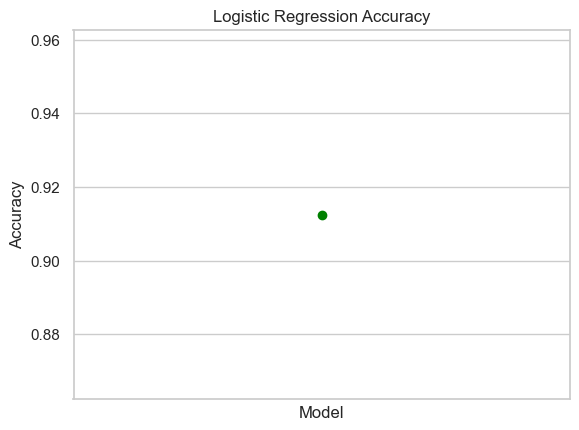

In [393]:

accuracy = accuracy_score(y_test, y_pred)

plt.plot([0], [accuracy], color='green', marker='o', linestyle='-', linewidth=2)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')

plt.xticks([])

plt.show()

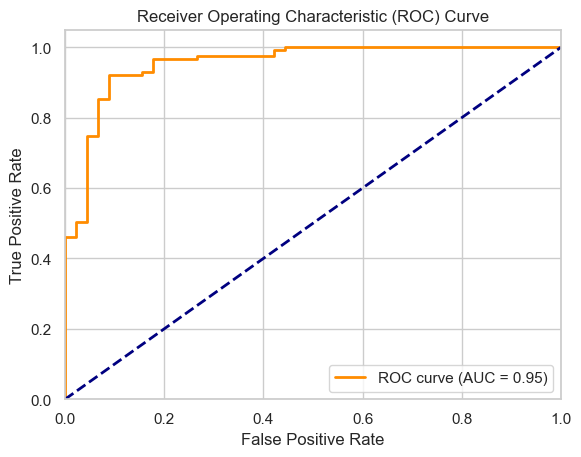

In [394]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test_scaled)[:, 1]  


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**RANDOM FOREST**

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        45
           1       0.93      1.00      0.97       115

    accuracy                           0.95       160
   macro avg       0.97      0.91      0.93       160
weighted avg       0.95      0.95      0.95       160

Confusion Matrix:
 [[ 37   8]
 [  0 115]]


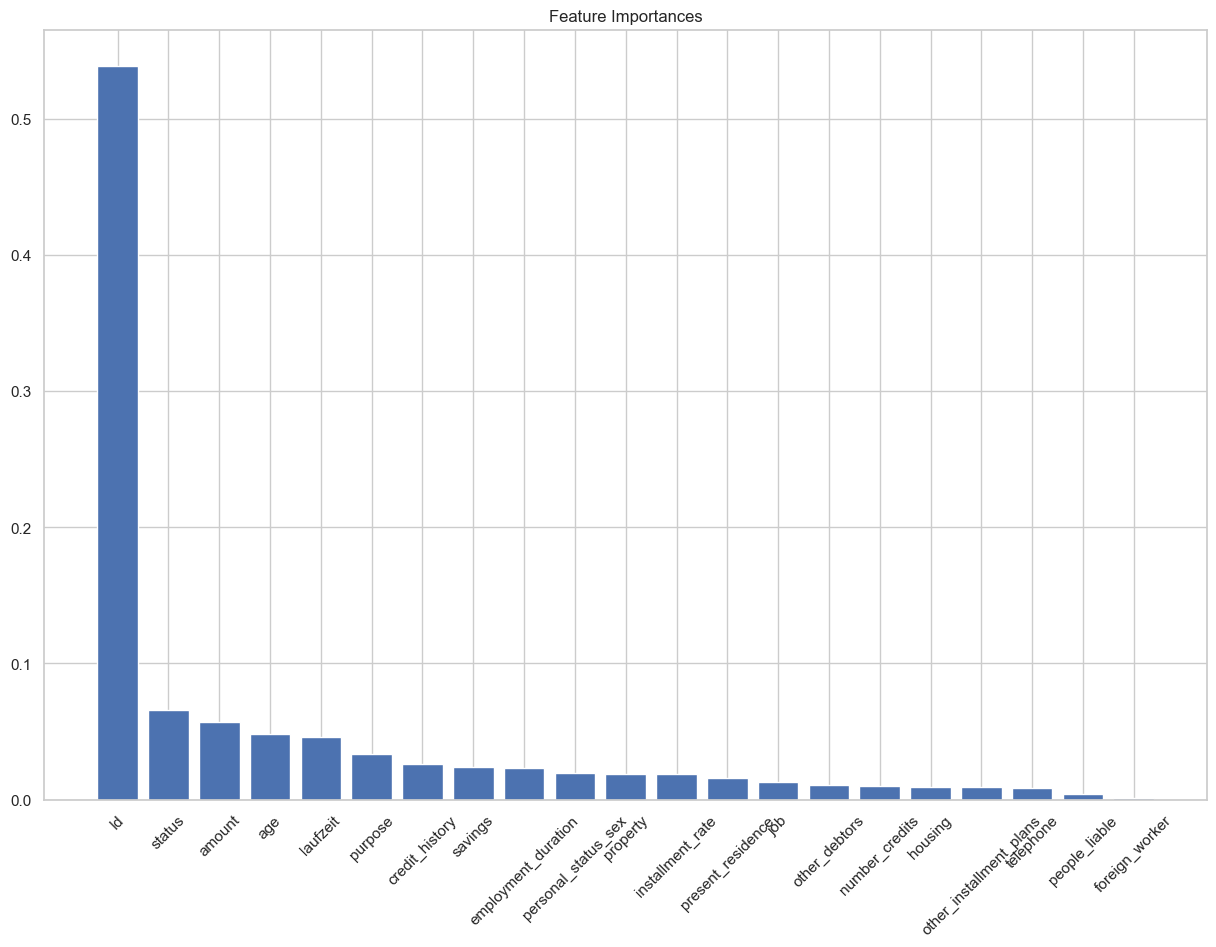

In [395]:
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42) 
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)



# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(15, 10))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X_train.columns[indices], rotation=45)
plt.title('Feature Importances')
plt.show()

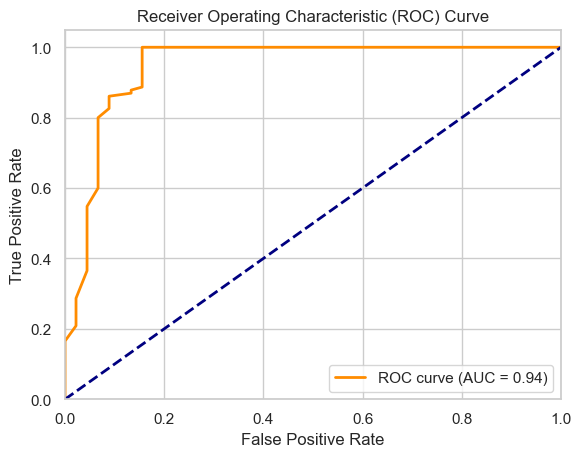

In [396]:

y_probs = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

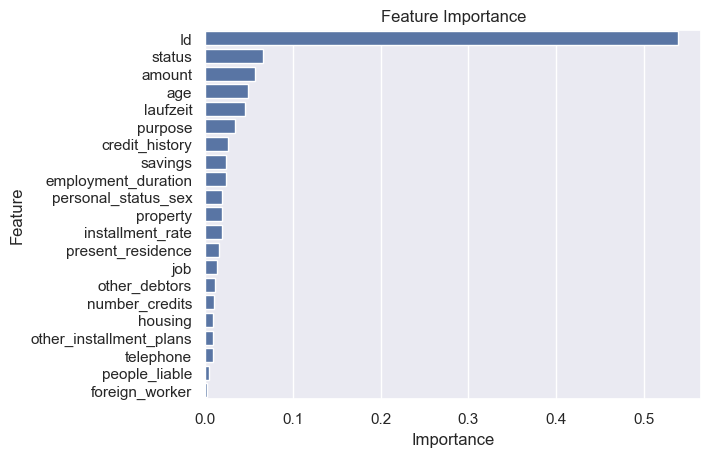

In [397]:

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


sns.set_theme()
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

**DECISION TREE**

In [398]:
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeClassifier(random_state=42)  
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


plt.figure(figsize=(200, 90))
plot_tree(model, filled=True, rounded=True, feature_names=X.columns, class_names=['Good Risk', 'Bad Risk'])
plt.show()

Accuracy: 0.91875
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        45
           1       0.94      0.95      0.94       115

    accuracy                           0.92       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.92      0.92      0.92       160

Confusion Matrix:
 [[ 38   7]
 [  6 109]]


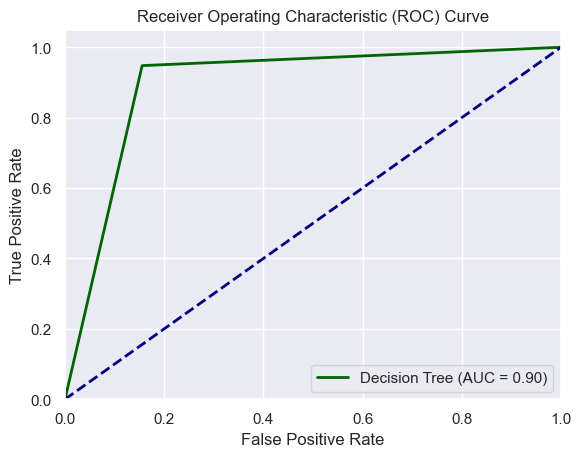

In [399]:

y_probs_dt = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkgreen', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

***TESTING TRUE NEGATIVE AND TRUE POSITIVES:***

In [400]:
df_test = df.iloc[y_test.index].copy()  
df_test['Prediction'] = y_pred
df_test['Actual'] = y_test.values

true_negatives = df_test[(df_test['Actual'] == 0) & (df_test['Prediction'] == 0)]

true_positives = df_test[(df_test['Actual'] == 1) & (df_test['Prediction'] == 1)]

# Display True Negatives
print("True Negatives (Low risk correctly predicted as low risk):")
display(true_negatives)

# Display True Positives
print("\nTrue Positives (High risk correctly predicted as high risk):")
display(true_positives)

True Negatives (Low risk correctly predicted as low risk):


Id  status  laufzeit  credit_history  purpose  amount  savings  \
696  834       4         6               2        2    4611        1   
667  790       2        15               0        0    1778        1   
621  580       1        24               1        3    1546        1   
760  940       4        48               4        0   10127        3   
658  780       2        30               4        2    8386        1   
721  881       3         9               0        3    1337        1   
746  919       1        48               4        1    6331        1   
692  828       2        12               2        5     639        1   
796  994       1        12               0        3    6199        1   
741  908       1        24               3        0    1333        1   
666  789       2        24               4        2    4736        1   
723  883       2        15               1        0    1264        2   
655  776       2        18               3        2    4297        1   
787  983       1        18               2        3    1882        1   
795  993       1        18               4        0    3966        1   
783  976       2        48               0       10   18424        1   
786  980       2        24               2        3    2039        1   
641  755       1        15               0        0     950        1   
715  874       2        24               1        6    1837        1   
705  849       2        36               2        6   12612        2   
754  931       1        12               2        0    1274        1   
750  925       1        18               2        2    2039        1   
764  944       1        12               2        3     709        1   
720  880       1        18               2        2    2473        1   
777  966       4        24               3        9    8648        1   
719  879       1        24               1       10    1358        5   
656  778       2        18               4        3    1245        1   
662  785       4        24               2        3    2397        3   
688  824       1        24               3        3    1659        1   
758  937       2        18               4        0     884        1   
644  758       2        30               2        0    2150        1   
652  771       1         9               2        0    1422        1   
640  754       2         6               2        0   14555        5   
738  904       1        18               0        2    3114        1   
776  964       2        15               2        3     802        1   
798  998       2        12               2        3    6468        5   
744  914       1        24               0        2    4110        1   
670  799       3        24               2        0     947        1   

     employment_duration  installment_rate  personal_status_sex  ...  \
696                    2                 1                    2  ...   
667                    2                 2                    2  ...   
621                    4                 4                    3  ...   
760                    3                 2                    3  ...   
658                    4                 2                    3  ...   
721                    2                 4                    3  ...   
746                    5                 4                    3  ...   
692                    3                 4                    3  ...   
796                    3                 4                    3  ...   
741                    1                 4                    3  ...   
666                    2                 2                    2  ...   
723                    3                 2                    4  ...   
655                    5                 4                    1  ...   
787                    3                 4                    2  ...   
795                    5                 1                    2  ...   
783                    3                 1   


True Positives (High risk correctly predicted as high risk):


Id  status  laufzeit  credit_history  purpose  amount  savings  \
63    79       4        15               2        3    1979        5   
533  665       2        12               2        3    1092        1   
66    84       4        15               4        2    1520        5   
346  420       4        12               2        3     776        1   
490  612       1        12               2        2    1620        1   
..   ...     ...       ...             ...      ...     ...      ...   
537  671       2        18               2        3    1301        1   
2      2       2        12               2        9     841        2   
519  646       4        24               4        3    2223        2   
589  738       2        15               2        5    1308        1   
513  639       1        24               4        1    2957        1   

     employment_duration  installment_rate  personal_status_sex  ...  \
63                     5                 4                    3  ...   
533                    3                 4                    2  ...   
66                     5                 4                    3  ...   
346                    3                 4                    4  ...   
490                    3                 2                    2  ...   
..                   ...               ...                  ...  ...   
537                    5                 4                    4  ...   
2                      4                 2                    2  ...   
519                    5                 4                    3  ...   
589                    5                 4                    3  ...   
513                    5                 4                    3  ...   

     other_installment_plans  housing  number_credits  job  people_liable  \
63                         3        2               1    3              2   
533                        3        2               2    3              2   
66                         3        2               1    3              2   
346                        3        2               1    3              2   
490                        3        2               1    3              2   
..                       ...      ...             ...  ...            ...   
537                        3        2               1    2              2   
2                          3        1               1    2              2   
519                        1        2               2    3              2   
589                        3        2               2    2              2   
513                        3        2               2    3              2   

     telephone  foreign_worker  credit_risk  Prediction  Actual  
63           1               2            1           1       1  
533          2               2            1           1       1  
66           1               2            1           1       1  
346          1               2            1           1       1  
490          1               2            1           1       1  
..         ...             ...          ...         ...     ...  
537          1               2            1           1       1  
2            1               2            1           1       1  
519          1               2            1           1       1  
589          1               2            1           1       1  
513          2               2            1           1       1  

[109 rows x 24 columns]